<a href="https://colab.research.google.com/github/anis-kaci/Computer-Vision/blob/main/Image_indexation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

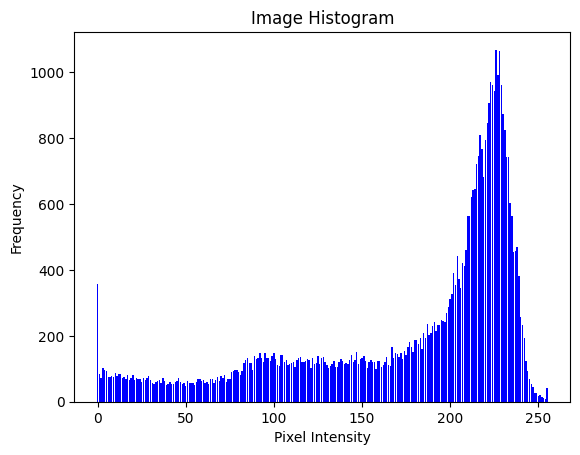

In [ ]:
  import matplotlib.pyplot as plt

# Reading the histogram values from a .txt file
histogram_data = {}
with open('1_histo.txt', 'r') as file:
    for line in file:
        key, value = map(int, line.split())
        histogram_data[key] = value

# Extracting keys (pixel intensities) and values (frequencies)
pixel_values = list(histogram_data.keys())
frequencies = list(histogram_data.values())

# Plotting the histogram
plt.bar(pixel_values, frequencies, color='blue')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.title('Image Histogram')
plt.show()


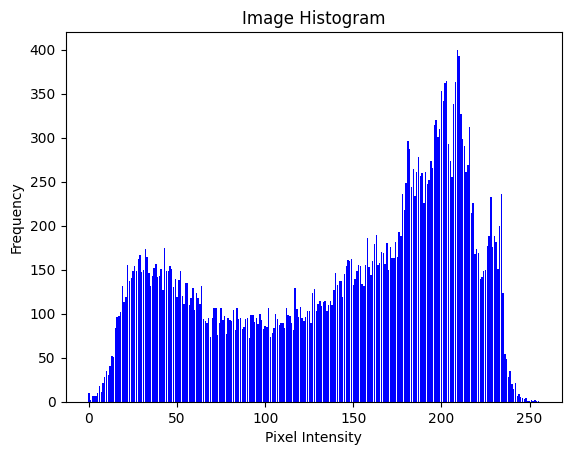

In [ ]:
  import matplotlib.pyplot as plt

# Reading the histogram values from a .txt file
histogram_data = {}
with open('2_histo.txt', 'r') as file:
    for line in file:
        key, value = map(int, line.split())
        histogram_data[key] = value

# Extracting keys (pixel intensities) and values (frequencies)
pixel_values = list(histogram_data.keys())
frequencies = list(histogram_data.values())

# Plotting the histogram
plt.bar(pixel_values, frequencies, color='blue')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.title('Image Histogram')
plt.show()


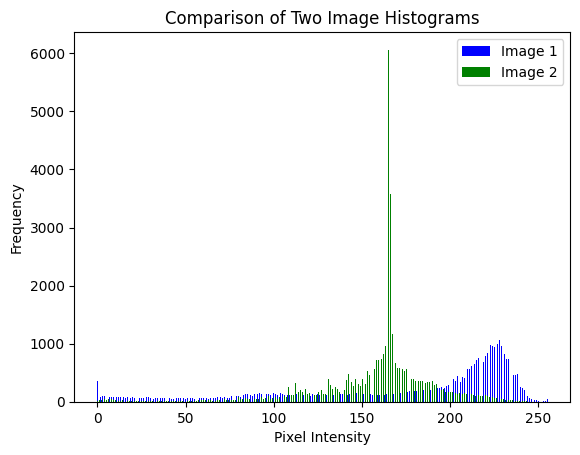

In [ ]:
import matplotlib.pyplot as plt

# Function to read histogram data from a file
def read_histogram(file_path):
    histogram_data = {}
    with open(file_path, 'r') as file:
        for line in file:
            key, value = map(int, line.split())
            histogram_data[key] = value
    return histogram_data

# Read histogram data from both files
histogram_data1 = read_histogram('1_histo.txt')
histogram_data2 = read_histogram('14_histo.txt')

# Extracting keys (pixel intensities) and values (frequencies)
pixel_values1 = list(histogram_data1.keys())
frequencies1 = list(histogram_data1.values())

pixel_values2 = list(histogram_data2.keys())
frequencies2 = list(histogram_data2.values())

# Plotting both histograms on the same plot
plt.bar(pixel_values1, frequencies1, color='blue', width=0.4, label='Image 1', align='center')
plt.bar(pixel_values2, frequencies2, color='green', width=0.4, label='Image 2', align='edge')

plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.title('Comparison of Two Image Histograms')
plt.legend()

plt.show()


In [ ]:
import numpy as np

# Function to normalize histogram
def normalize_histogram(histogram_data):
    total = sum(histogram_data.values())
    normalized_histogram = {key: value / total for key, value in histogram_data.items()}
    return normalized_histogram

# Function to compute Bhattacharyya distance
def bhattacharyya_distance(hist1, hist2):
    # Ensure both histograms have the same keys (intensity levels)
    all_keys = sorted(set(hist1.keys()).union(hist2.keys()))

    # Filling missing values in histograms with 0
    p = np.array([hist1.get(key, 0) for key in all_keys])
    q = np.array([hist2.get(key, 0) for key in all_keys])

    # Compute Bhattacharyya coefficient
    bc = np.sum(np.sqrt(p * q))

    # Compute Bhattacharyya distance
    distance = -np.log(bc) if bc > 0 else float('inf')

    return distance

# Read and normalize histogram data from both files
histogram_data1 = read_histogram('1_histo.txt')
histogram_data2 = read_histogram('2_histo.txt')

normalized_hist1 = normalize_histogram(histogram_data1)
normalized_hist2 = normalize_histogram(histogram_data2)

# Compute Bhattacharyya distance
distance = bhattacharyya_distance(normalized_hist1, normalized_hist2)
print(f'Bhattacharyya distance between the two histograms: {distance}')

Bhattacharyya distance between the two histograms: 0.08929866756241435


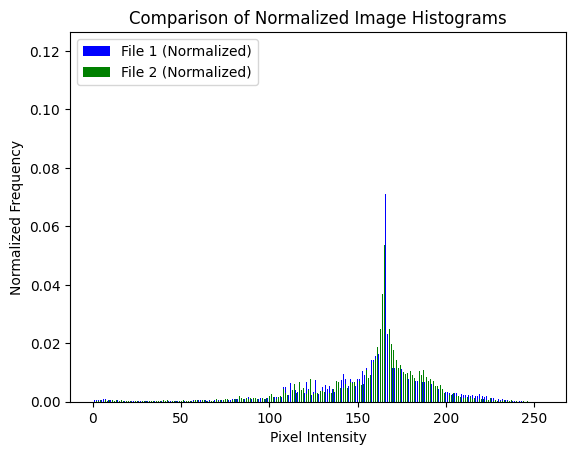

In [ ]:
import matplotlib.pyplot as plt

# Function to read histogram data from a file
def read_histogram(file_path):
    histogram_data = {}
    with open(file_path, 'r') as file:
        for line in file:
            key, value = map(int, line.split())
            histogram_data[key] = value
    return histogram_data

# Function to normalize histogram
def normalize_histogram(histogram_data):
    total = sum(histogram_data.values())
    normalized_histogram = {key: value / total for key, value in histogram_data.items()}
    return normalized_histogram

# Read and normalize histogram data from both files
histogram_data1 = read_histogram('14_histo.txt')
histogram_data2 = read_histogram('14_50_histo.txt')

normalized_hist1 = normalize_histogram(histogram_data1)
normalized_hist2 = normalize_histogram(histogram_data2)

# Extracting keys (pixel intensities) and values (normalized frequencies)
pixel_values1 = list(normalized_hist1.keys())
frequencies1 = list(normalized_hist1.values())

pixel_values2 = list(normalized_hist2.keys())
frequencies2 = list(normalized_hist2.values())

# Plotting both normalized histograms on the same plot
plt.bar(pixel_values1, frequencies1, color='blue', width=0.4, label='File 1 (Normalized)', align='center')
plt.bar(pixel_values2, frequencies2, color='green', width=0.4, label='File 2 (Normalized)', align='edge')

plt.xlabel('Pixel Intensity')
plt.ylabel('Normalized Frequency')
plt.title('Comparison of Normalized Image Histograms')
plt.legend()

plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to read histogram data from a file
def read_histogram(file_path):
    histogram_data = {}
    with open(file_path, 'r') as file:
        for line in file:
            key, value = map(int, line.split())
            histogram_data[key] = value
    return histogram_data

# Function to normalize histogram
def normalize_histogram(histogram_data):
    total = sum(histogram_data.values())
    normalized_histogram = {key: value / total for key, value in histogram_data.items()}
    return normalized_histogram

# Function to compute Bhattacharyya distance
def bhattacharyya_distance(hist1, hist2):
    all_keys = sorted(set(hist1.keys()).union(hist2.keys()))
    p = np.array([hist1.get(key, 0) for key in all_keys])
    q = np.array([hist2.get(key, 0) for key in all_keys])
    bc = np.sum(np.sqrt(p * q))
    return -np.log(bc) if bc > 0 else float('inf')

# Function to compute Chi-Square distance
def chi_square_distance(hist1, hist2):
    all_keys = sorted(set(hist1.keys()).union(hist2.keys()))
    p = np.array([hist1.get(key, 0) for key in all_keys])
    q = np.array([hist2.get(key, 0) for key in all_keys])
    return np.sum((p - q) ** 2 / (p + q + 1e-10))  # Adding small value to avoid division by zero

# Function to compute Kullback-Leibler Divergence (KLD)
def kullback_leibler_divergence(hist1, hist2):
    all_keys = sorted(set(hist1.keys()).union(hist2.keys()))
    p = np.array([hist1.get(key, 0) for key in all_keys])
    q = np.array([hist2.get(key, 0) for key in all_keys])
    p += 1e-10  # Adding small value to avoid log(0)
    q += 1e-10
    return np.sum(p * np.log(p / q))

# Read and normalize histogram data from both files
histogram_data1 = read_histogram('1_histo.txt')
histogram_data2 = read_histogram('14_histo.txt')

normalized_hist1 = normalize_histogram(histogram_data1)
normalized_hist2 = normalize_histogram(histogram_data2)

# Compute distances
bhatt_distance = bhattacharyya_distance(normalized_hist1, normalized_hist2)
chi_square_dist = chi_square_distance(normalized_hist1, normalized_hist2)
kld_distance = kullback_leibler_divergence(normalized_hist1, normalized_hist2)

print(f'Bhattacharyya Distance: {bhatt_distance}')
print(f'Chi-Square Distance: {chi_square_dist}')
print(f'Kullback-Leibler Divergence (KLD): {kld_distance}')




Bhattacharyya Distance: 0.32732013472084515
Chi-Square Distance: 0.8529461338078003
Kullback-Leibler Divergence (KLD): 1.3178630441636607


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to read histogram data from a file
def read_histogram(file_path):
    histogram_data = {}
    with open(file_path, 'r') as file:
        for line in file:
            key, value = map(int, line.split())
            histogram_data[key] = value
    return histogram_data

# Function to normalize histogram
def normalize_histogram(histogram_data):
    total = sum(histogram_data.values())
    normalized_histogram = {key: value / total for key, value in histogram_data.items()}
    return normalized_histogram

# Function to compute Bhattacharyya distance
def bhattacharyya_distance(hist1, hist2):
    all_keys = sorted(set(hist1.keys()).union(hist2.keys()))
    p = np.array([hist1.get(key, 0) for key in all_keys])
    q = np.array([hist2.get(key, 0) for key in all_keys])
    bc = np.sum(np.sqrt(p * q))
    return -np.log(bc) if bc > 0 else float('inf')

# Function to compute Chi-Square distance
def chi_square_distance(hist1, hist2):
    all_keys = sorted(set(hist1.keys()).union(hist2.keys()))
    p = np.array([hist1.get(key, 0) for key in all_keys])
    q = np.array([hist2.get(key, 0) for key in all_keys])
    return np.sum((p - q) ** 2 / (p + q + 1e-10))  # Adding small value to avoid division by zero

# Function to compute Kullback-Leibler Divergence (KLD)
def kullback_leibler_divergence(hist1, hist2):
    all_keys = sorted(set(hist1.keys()).union(hist2.keys()))
    p = np.array([hist1.get(key, 0) for key in all_keys])
    q = np.array([hist2.get(key, 0) for key in all_keys])
    p += 1e-10  # Adding small value to avoid log(0)
    q += 1e-10
    return np.sum(p * np.log(p / q))

# Read and normalize histogram data from both files
histogram_data1 = read_histogram('1_histo.txt')
histogram_data2 = read_histogram('14_histo.txt')

normalized_hist1 = normalize_histogram(histogram_data1)
normalized_hist2 = normalize_histogram(histogram_data2)

# Compute distances
bhatt_distance = bhattacharyya_distance(normalized_hist1, normalized_hist2)
chi_square_dist = chi_square_distance(normalized_hist1, normalized_hist2)
kld_distance = kullback_leibler_divergence(normalized_hist1, normalized_hist2)

print(f'Bhattacharyya Distance: {bhatt_distance}')
print(f'Chi-Square Distance: {chi_square_dist}')
print(f'Kullback-Leibler Divergence (KLD): {kld_distance}')



Bhattacharyya Distance: 0.32732013472084515
Chi-Square Distance: 0.8529461338078003
Kullback-Leibler Divergence (KLD): 1.3178630441636607


In [ ]:
#Test from Github
import cv2
import numpy as np

def hist_ncc(image_path1, image_path2):
    image1 = cv2.imread(image_path1)
    image2 = cv2.imread(image_path2)

    if image1.shape != image2.shape:
        image2 = cv2.resize(image2, (image1.shape[1], image1.shape[0]))

    gray_image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
    gray_image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

    hist_image1 = cv2.calcHist([gray_image1], [0], None, [256], [0, 256])
    hist_image2 = cv2.calcHist([gray_image2], [0], None, [256], [0, 256])

    hist_image1 /= hist_image1.sum()
    hist_image2 /= hist_image2.sum()

    hist_intersection = cv2.compareHist(hist_image1, hist_image2, cv2.HISTCMP_INTERSECT)
    hist_correlation = cv2.compareHist(hist_image1, hist_image2, cv2.HISTCMP_CORREL)
    hist_chi_square = cv2.compareHist(hist_image1, hist_image2, cv2.HISTCMP_CHISQR)
    hist_bhattacharyya = cv2.compareHist(hist_image1, hist_image2, cv2.HISTCMP_BHATTACHARYYA)

    ncc = np.sum((gray_image1 - np.mean(gray_image1)) * (gray_image2 - np.mean(gray_image2)) / (
                (np.std(gray_image1) * np.std(gray_image2)) * gray_image1.size))

    comparison_values = [hist_intersection, hist_correlation, hist_chi_square, hist_bhattacharyya, ncc]
    print(comparison_values)
    final_comparison_value = sum(comparison_values) / len(comparison_values)
    return final_comparison_value

image_path1 = r'Ball_007_0000.jpg'
image_path_comp = r'Normal_4140.jpg'

#image_path1 = r'14.pgm'
#image_path_comp = r'14_50.pgm'

result = hist_ncc(image_path1, image_path_comp)

print(f"Comparison result: {result}")

[0.9500986320745142, 0.9995671051342475, 0.012153707950045434, 0.04014308136886164, 0.33503938613162554]
Comparison result: 0.4674003825318588
